In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#source activate analysis
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import numpy as np
from pylab import *
import os
import datetime
from datetime import timedelta
import glob
from wrf import getvar,ALL_TIMES
import glob
from netCDF4 import Dataset
from scipy.io import netcdf
#varnm='U'
varnm='U10'
varnm0='V10'
vunit='m/s'
punit='lonlat'
fout='png'

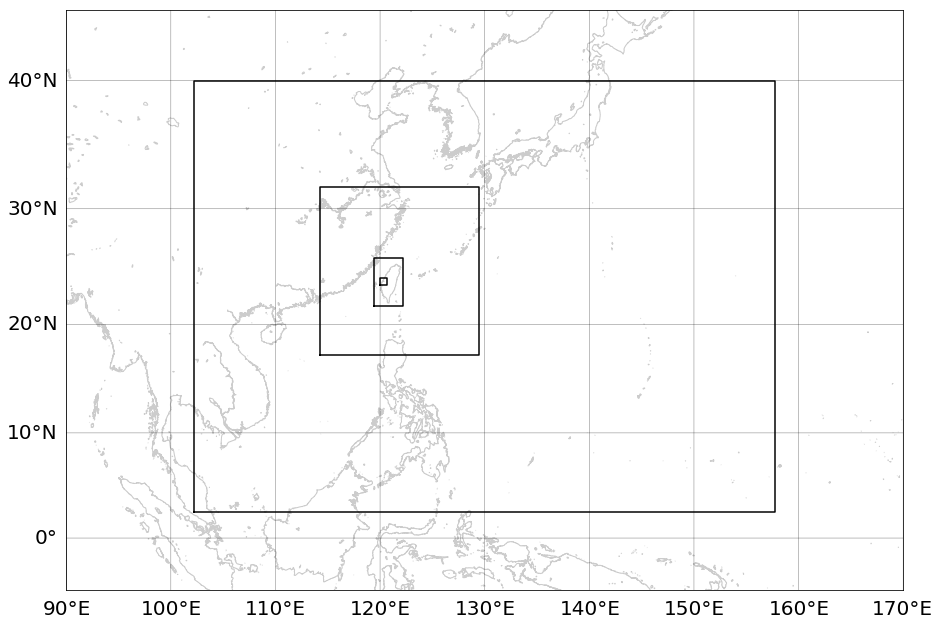

In [2]:
scn='yulin3w0'
#dname='/archives/simon/wrf/yulin3w0/'
dname='/archives/simon/wrf/yulin4wda0/'
ncs=glob.glob(dname+'WPS*/geo_em.d*nc')
varnms=['XLAT_M','XLONG_M','LANDMASK']
ovars=[]
fig=plt.figure(figsize=(15,15))
ax=plt.subplot(1,1,1)
for ii,tfile in enumerate(ncs):
    #print(str(ii)+tfile)
    tlink=netcdf.netcdf_file(tfile,'r')
    for jj,tvar in enumerate(varnms):
        #print(str(jj)+tvar)
        ovars.append(tlink.variables[tvar][:].copy())
m=Basemap(projection='merc',llcrnrlon=90,urcrnrlon=170,llcrnrlat=-5, \
  urcrnrlat=45,resolution='f',lat_0=20.,lon_0=120.,lat_ts=20.,ax=ax)
m.drawcoastlines(color=[0.8,0.8,0.8])
m.drawmeridians(np.arange(60,200,10),labels=[0,0,0,1],linewidth=0.5,fontsize=20)
m.drawparallels(np.arange(0,70,10),labels=[1,0,0,0],linewidth=0.5,fontsize=20)
for ii,tfile in enumerate(ncs):
    x1=np.concatenate((ovars[1+ii*3][0,0,:],ovars[1+ii*3][0,:,-1],ovars[1+ii*3][0,-1,:][::-1],ovars[1+ii*3][0,:,0][::-1]),axis=0)
    y1=np.concatenate((ovars[0+ii*3][0,0,:],ovars[0+ii*3][0,:,-1],ovars[0+ii*3][0,-1,:][::-1],ovars[0+ii*3][0,:,0][::-1]),axis=0)
    x1,y1=m(x1,y1)
    ax.plot(x1,y1,'k')
fig.savefig('wrf_domains.png',rasterized=True,format='png', \
                bbox_inches='tight',pad_inches=0.1,dpi=600) 

In [3]:
ncs

['/archives/simon/wrf/yulin4wda0/WPS/geo_em.d03.nc',
 '/archives/simon/wrf/yulin4wda0/WPS/geo_em.d02.nc',
 '/archives/simon/wrf/yulin4wda0/WPS/geo_em.d04.nc',
 '/archives/simon/wrf/yulin4wda0/WPS/geo_em.d01.nc']

In [4]:
ii=0
xi=ovars[1+ii*3]
yi=ovars[0+ii*3]
ii=2
xi1=ovars[1+ii*3]
yi1=ovars[0+ii*3]

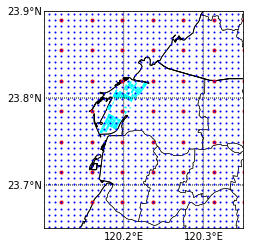

In [6]:
filename

'wrf_gridpoint_map'

In [7]:

ncd='/archives/simon/wrf/'+scn+'/WRFV3/out/'
nc='wrfout_d03_2014-06-25_00:00:00'
tfile=netcdf.netcdf_file(ncd+nc,'r')
uu=tfile.variables[varnm][:].copy()
vv=tfile.variables[varnm0][:].copy()
tt=tfile.variables['Times'][:].copy()
tt=tt.astype(str)
if varnm=='U':
    lat=tfile.variables['XLAT_U'][:].copy()
    lon=tfile.variables['XLONG_U'][:].copy()
    (d1,d2,d3,d4)=uu.shape
elif varnm=='U10':
    lat=tfile.variables['XLAT'][:].copy()
    lon=tfile.variables['XLONG'][:].copy()
    (d1,d3,d4)=uu.shape
lat=lat[0,:,:]
lon=lon[0,:,:]
xmax=lon.max();xmin=lon.min();ymax=lat.max();ymin=lat.min()

FileNotFoundError: [Errno 2] No such file or directory: '/archives/simon/wrf/yulin3w0/WRFV3/out/wrfout_d03_2014-06-25_00:00:00'

In [ ]:
#plt.rcParams['axes.titlepad']=1.5
filename='%s%s%s.png' % (scn,nc,punit)
#pdf=PdfPages(filename)
fig,ax=plt.subplots(5,4,figsize=(13,20))
pnt=0
ly=0
buf=0.2
cmap=plt.get_cmap('YlOrRd')#plt.cm.jet
bounds=np.linspace(0,20,21)
norm=mpl.colors.BoundaryNorm(bounds,cmap.N)
#helper = np.vectorize(lambda x: datetime.datetime(1950,1,1)+datetime.timedelta(float(x)))
#datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
d1=20
m=Basemap(projection='merc',llcrnrlon=xmin+buf,urcrnrlon=xmax-buf,llcrnrlat=ymin+buf, \
  urcrnrlat=ymax-buf,resolution='f')
alon,alat=m(lon,lat)
for g in np.linspace(0,d1-1,d1,dtype=int):
    pnt=pnt+1    
    axi=ax[int((g-g%4)/4),g%4]
    if varnm=='U':
        data=uu[g,ly,:,:]
        tnm='WRF %s (%s) at layer %s t= %s' % (varnm,vunit,str(ly),str(pnt))
    elif varnm=='U10':
        uui=uu[g*6,:,:]
        vvi=vv[g*6,:,:]
        tnm='Wind speed(%s) %s' % (vunit,''.join(tt[g*6])[5:13])
        #datetime.datetime.today().strftime('%Y-%m-%d')
    spd=abs(uui+vvi*1j)
    cs=axi.pcolormesh(alon,alat,spd,shading='flat',cmap=cmap,norm=norm)
    m.drawcoastlines(color=[0.8,0.8,0.8],ax=axi)
    m.drawmeridians(np.arange(60,200,1),labels=[0,0,0,1],linewidth=0.5,fontsize=10,ax=axi)
    m.drawparallels(np.arange(0,70,1),labels=[1,0,0,0],linewidth=0.5,fontsize=10,ax=axi)
    #cs=axi.pcolormesh(alon,alat,data,shading='flat',cmap=cmap)
    qq=axi.quiver(alon[::8,::8],alat[::8,::8],uui[::8,::8],vvi[::8,::8],units='width')
    qk=axi.quiverkey(qq,0,-0.05,10,r'$10 \frac{m}{s}$',labelpos='E',coordinates='axes')
    axi.set_aspect('equal')
    axi.set_title(tnm,size=10)    
#fig.delaxes(ax[3,3])
p0=ax[0,0].get_position().get_points().flatten()
p1=ax[0,1].get_position().get_points().flatten()
p2=ax[0,2].get_position().get_points().flatten()
p3=ax[0,3].get_position().get_points().flatten()
caxp=fig.add_axes([p0[0],0.92,p3[2]-p0[0],0.01])
cb=plt.colorbar(mappable=cs,cax=caxp,orientation='horizontal')
cb.ax.tick_params(labelsize=10)
fig.savefig(filename,rasterized=True,bbox_inches='tight')
#pdf.savefig(rasterized=True,bbox_inches='tight',pad_inches=-1)
#pdf.close() 

In [ ]:
#filename='outfile.pdf'
fig.savefig(filename,rasterized=True,format='pdf',bbox_inches='tight',pad_inches=0.1)

In [ ]:
ucom='pdftops %s%s.pdf %s%s.ps' % (nc,punit,nc,punit)
os.system(ucom)
ucom='rm -f %s%s.pdf' % (nc,punit)
os.system(ucom)

In [ ]:
uu.shape